In [2]:
#======================
# Large plots views 
#======================

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# <font color = 'blue'> Rossmann Sales Prediction </font>

# Agenda

1. Contexto
2. Desafio
3. Desenvolvimento da Solução
4. Conclusão & Demonstração
5. Próximas etapas

# <font color='blue'> 1. Contexto</font>

* Demonstrativo de resultados mensal
* Solicitação de previsão de vendas para cada loja nas próximas 6 semanas  

# <font color='blue'> 2. Desafio</font>

# Problema
 - Definição do orçamento como requisito para investimento na unidade

# Causas
- Ausência de previsão de vendas;
- Processo de previsão executado em dados passados;
- Processo de previsão de todas as lojas é realizado manualmente;

# Solução
- Usar machine learning para realizar as previsões;
- Acesso as previsões de forma automática;

# <font color='blue'>3.  Desenvolvimento da Solução </font>

In [6]:
print( 'Number of Rows:    {}'.format( df1.shape[0] ) )
print( 'Number of Columns: {}'.format( df1.shape[1] ) )

Number of Rows:    1017209
Number of Columns: 18


# Descrição Estatística

In [21]:
# Central Tendency - mean, median

ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame( num_attributes.apply(np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate

m = pd.concat( [ d2,d3,d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


# Mapa de Hipóteses

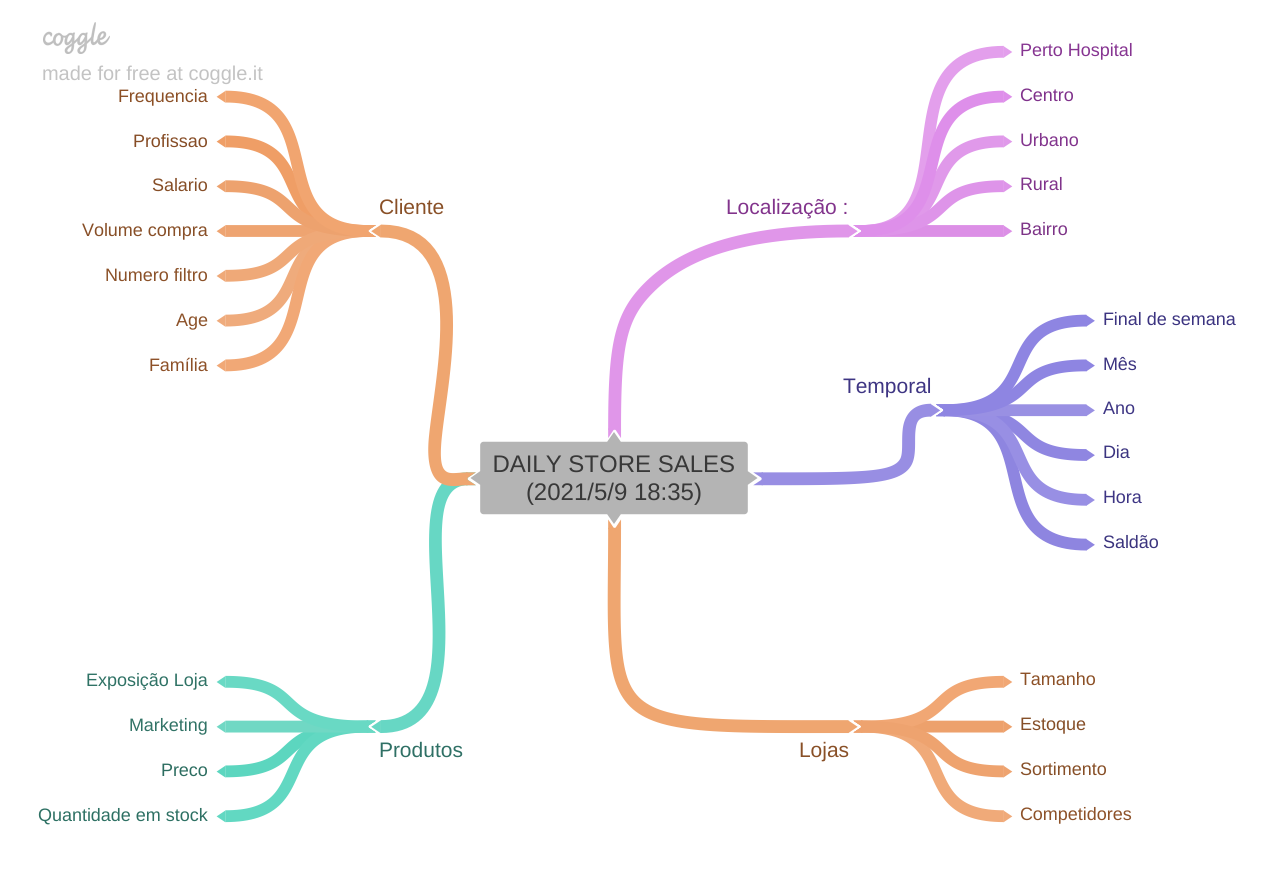

In [29]:
Image( 'image/daily_store_map_image.png' )

# Hipóteses


##  Hipóteses para fator Loja correlacionados com fator venda


1. Lojas com maior quadro de funcionários deveriam vender mais

2. Lojas com maior estoque deveriam vender mais.

3. Lojas de maior porte deveriam vender mais.

4. Lojas de menor porte deveriam vender menos

5. Lojas com maior sortimento deveriam vender mais.

6. Lojas com competidores a mais tempo deveriam vender mais.




## Hipóteses para fator Produto correlacionados com fator venda¶

1. Lojas que investem mais em Marketing deveriam vender mais.

2. Lojas que expoe mais o produto nas vitrines deveriam vender mais.

3. Lojas que tem podutos com menores preços deveriam vender mais.

4. Lojas que mantém promoções por maiores períodos deveriam vender mais.


## Hipóteses para fator Tempo (Sazonalidade)

1. Lojas abertas durante o feriado de Natal deveriam vender mais

2. Lojas deveriam vender mais ao londo dos anos

3. Lojas deveriam vender mais no segundo semestre do ano

4. Lojas deveriam vender mais depoois do dia 10 de cada mês

5. Lojas deveriam vender menos aos finais de semana

6. Lojas deveriam vender menos durante os feriados escolares.

# Lista Final de Hipóteses

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores a mais tempo deveriam vender mais.

**4.** Lojas que mantém promoções por maiores períodos deveriam vender mais.

**5.** Lojas que tem podutos com menores preços deveriam vender mais. 

**6.** Lojas abertas durante o feriado de Natal deveriam vender mais

**7.** Lojas deveriam vender mais ao londo dos anos

**8.** Lojas deveriam vender mais no segundo semestre do ano

**9.** Lojas deveriam vender mais depoois do dia 10 de cada mês

**10.** Lojas deveriam vender menos aos finais de semana

**11.** Lojas deveriam vender menos durante os feriados escolares.



# Numerical attributes

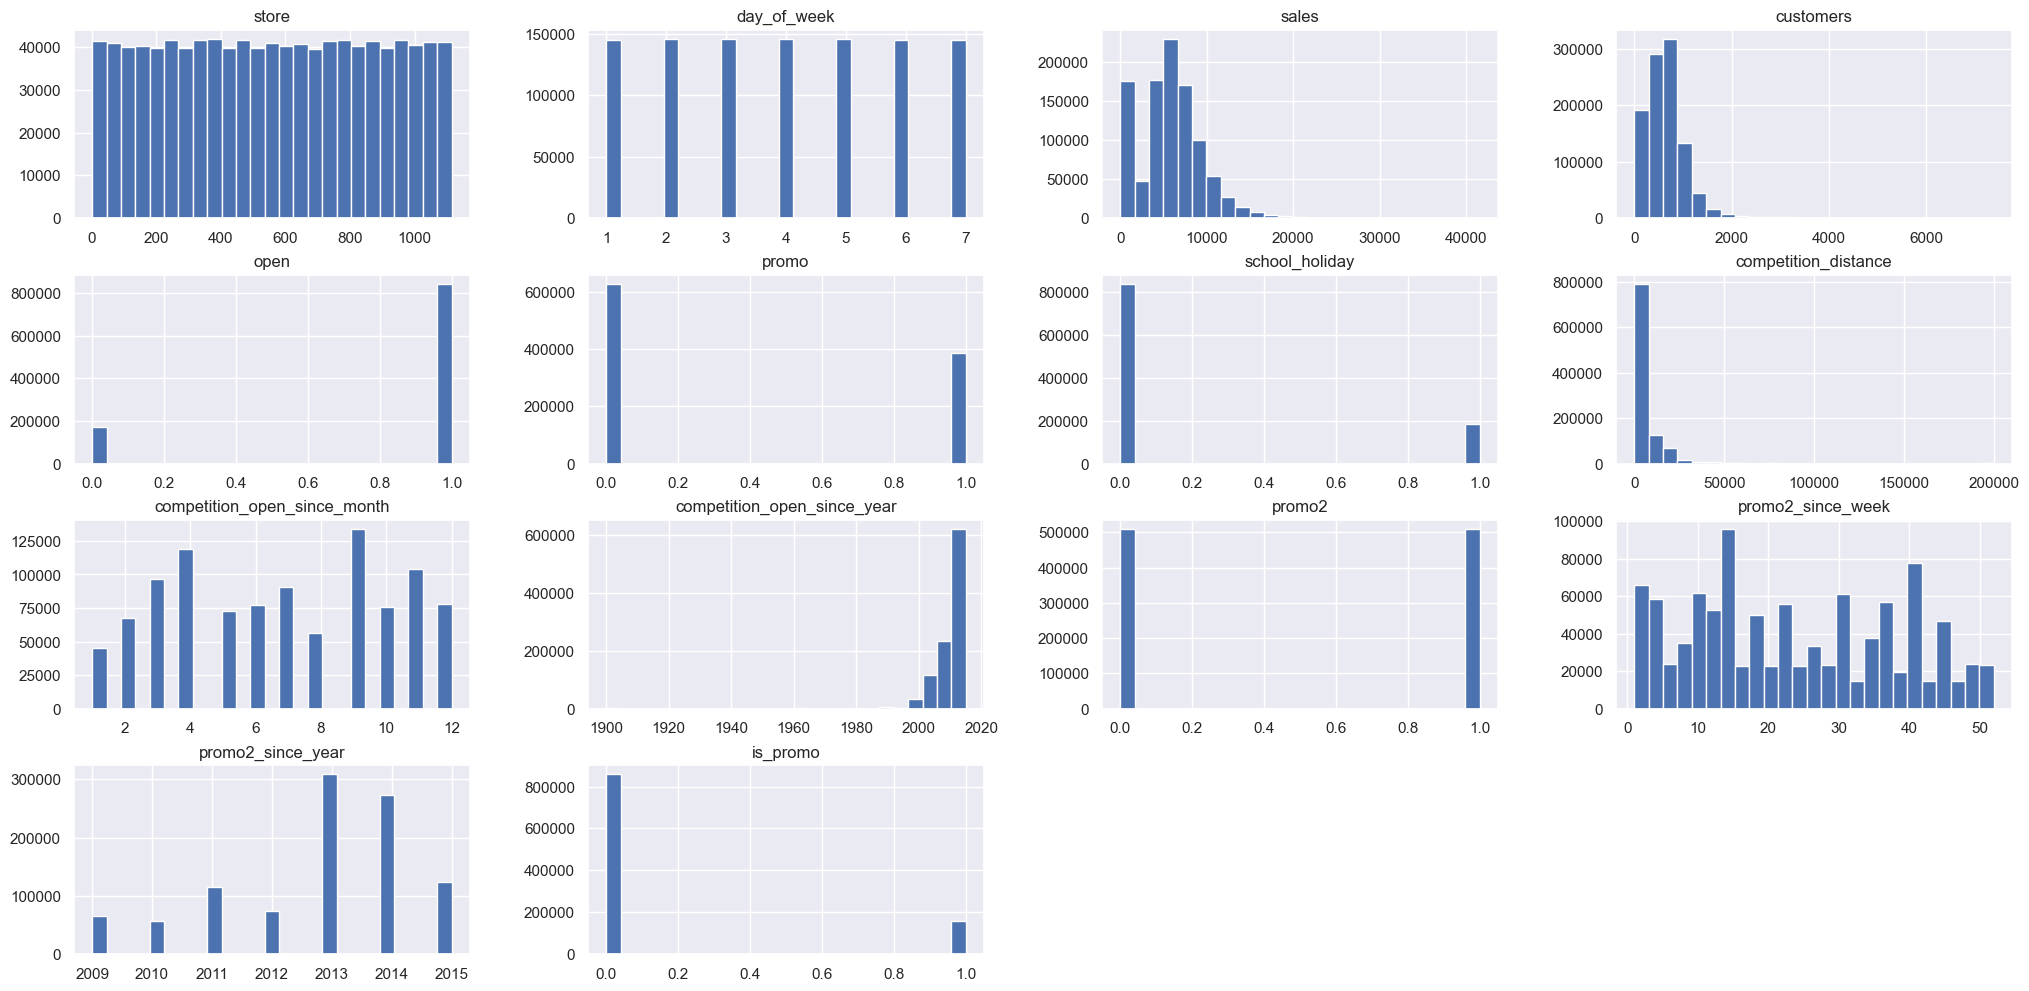

In [38]:
num_attributes.hist( bins=25 );

 sales -> skew neg (0 - 20000)
 
 customers -> skew neg (0 -2000)
 
 competition_open_since_year ->  skew neg (2000 2020)
 
 promo2_since_year -> [2013(max), 2014, 2015(min)]

<AxesSubplot:>

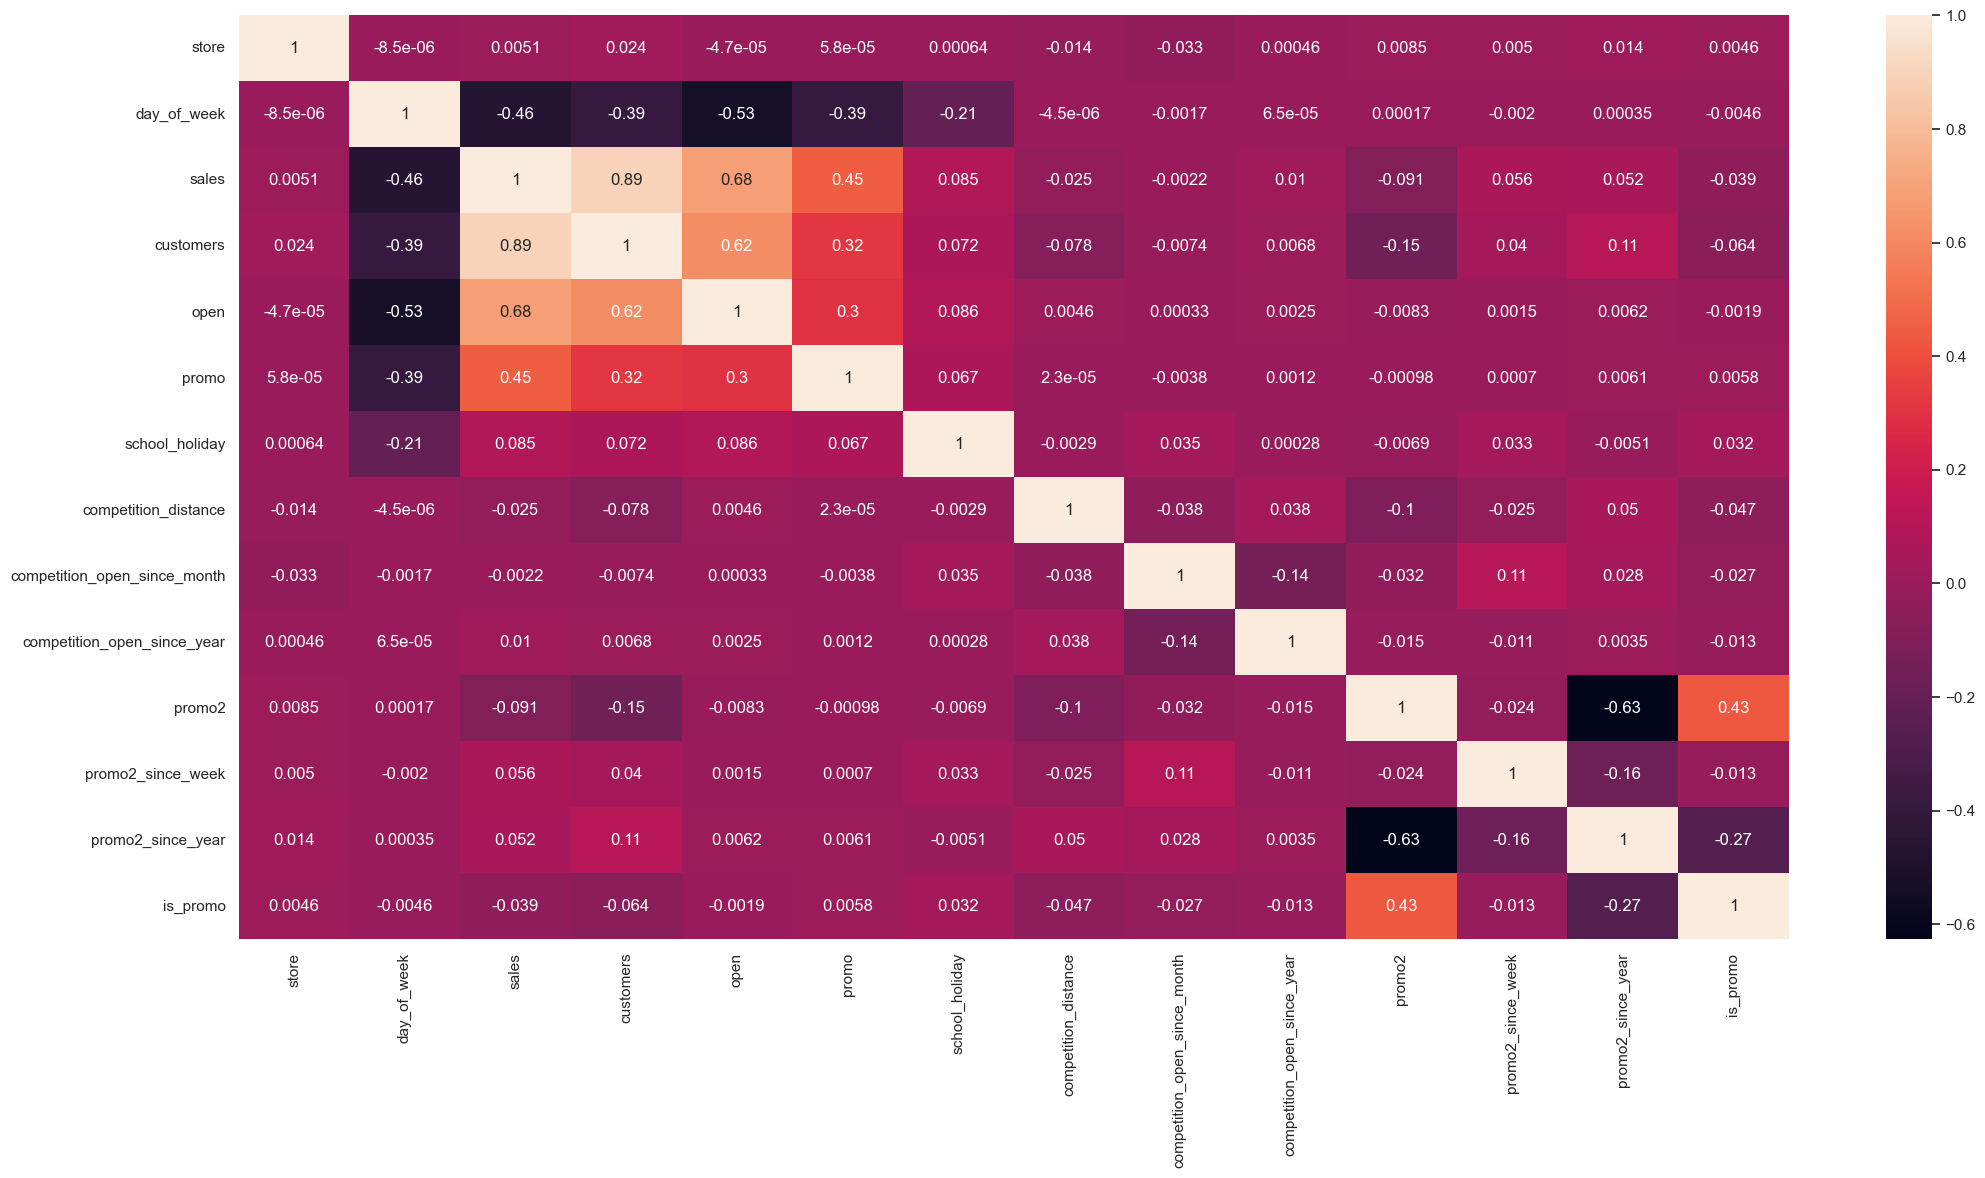

In [67]:
# pearson [-1, 1], numeric attributes correlation
# look at impacts correlation at sales; (promo, open); although customers indicated high correlation; we can't predict the number of customers on next 6 six weeks   

correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True )

 # Categorical Variable

In [39]:
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


<AxesSubplot:>

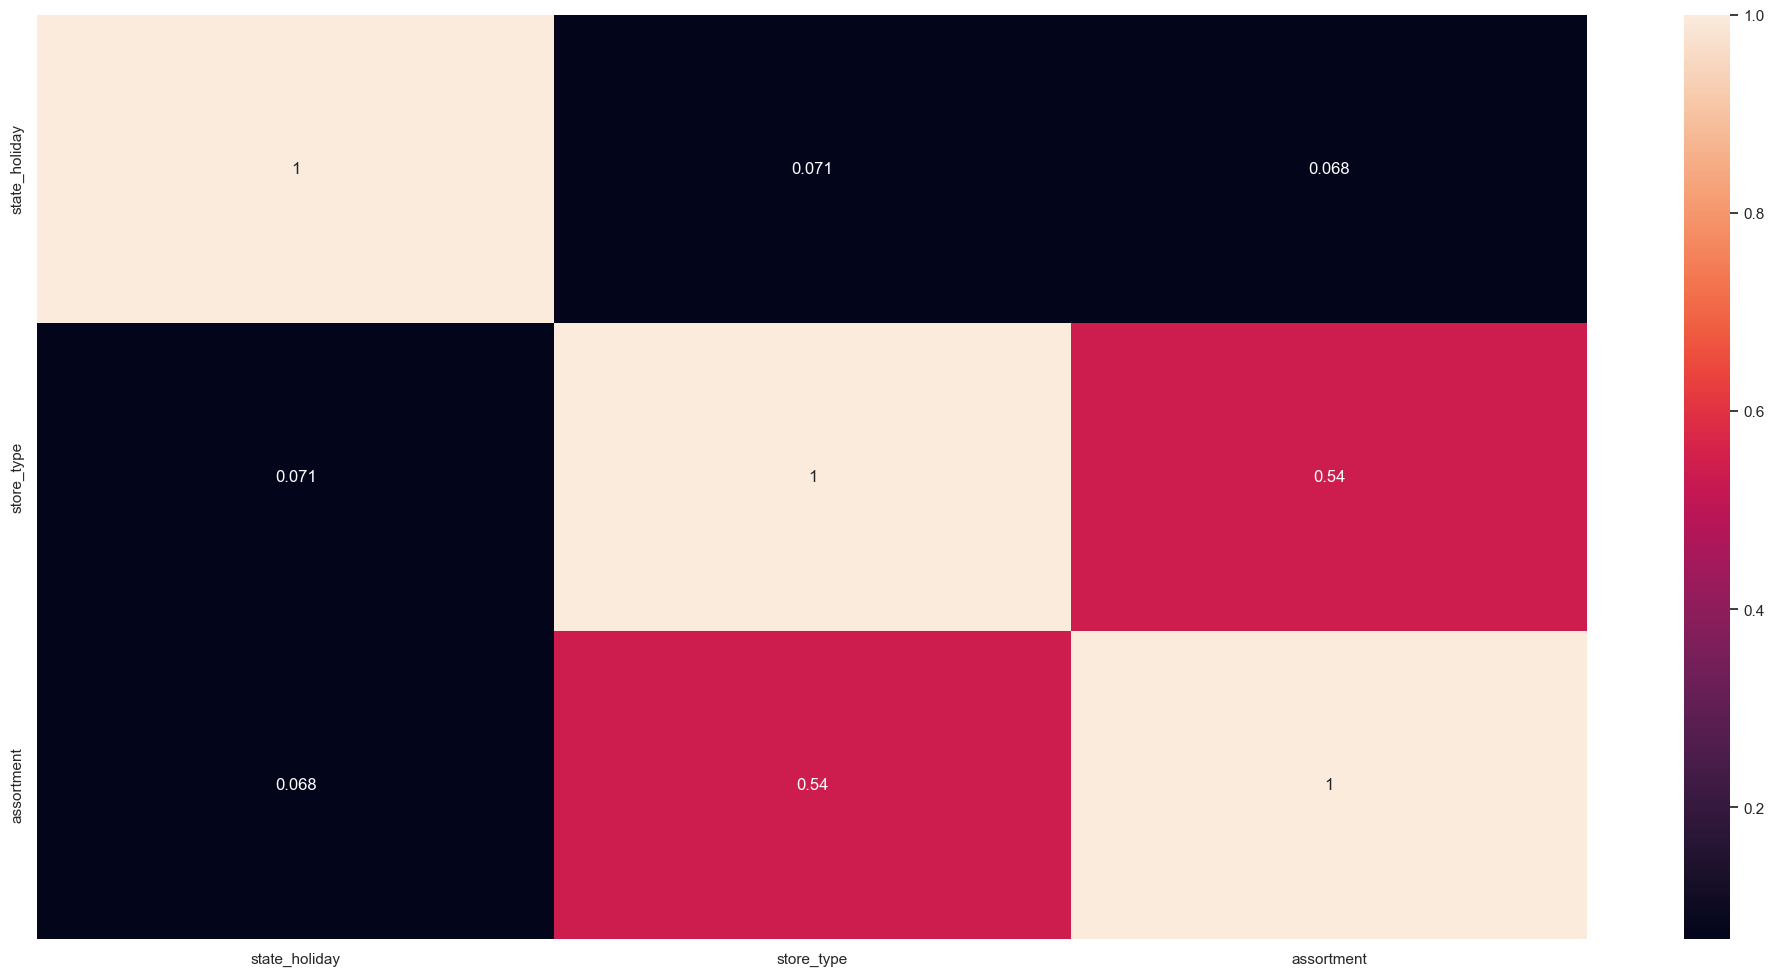

In [78]:
sns.heatmap( d, annot=True)

# state_holiday is low correlated with (store_type, assortment) 
# store_type is high correlated with (assortment)

<AxesSubplot:xlabel='sales', ylabel='Density'>

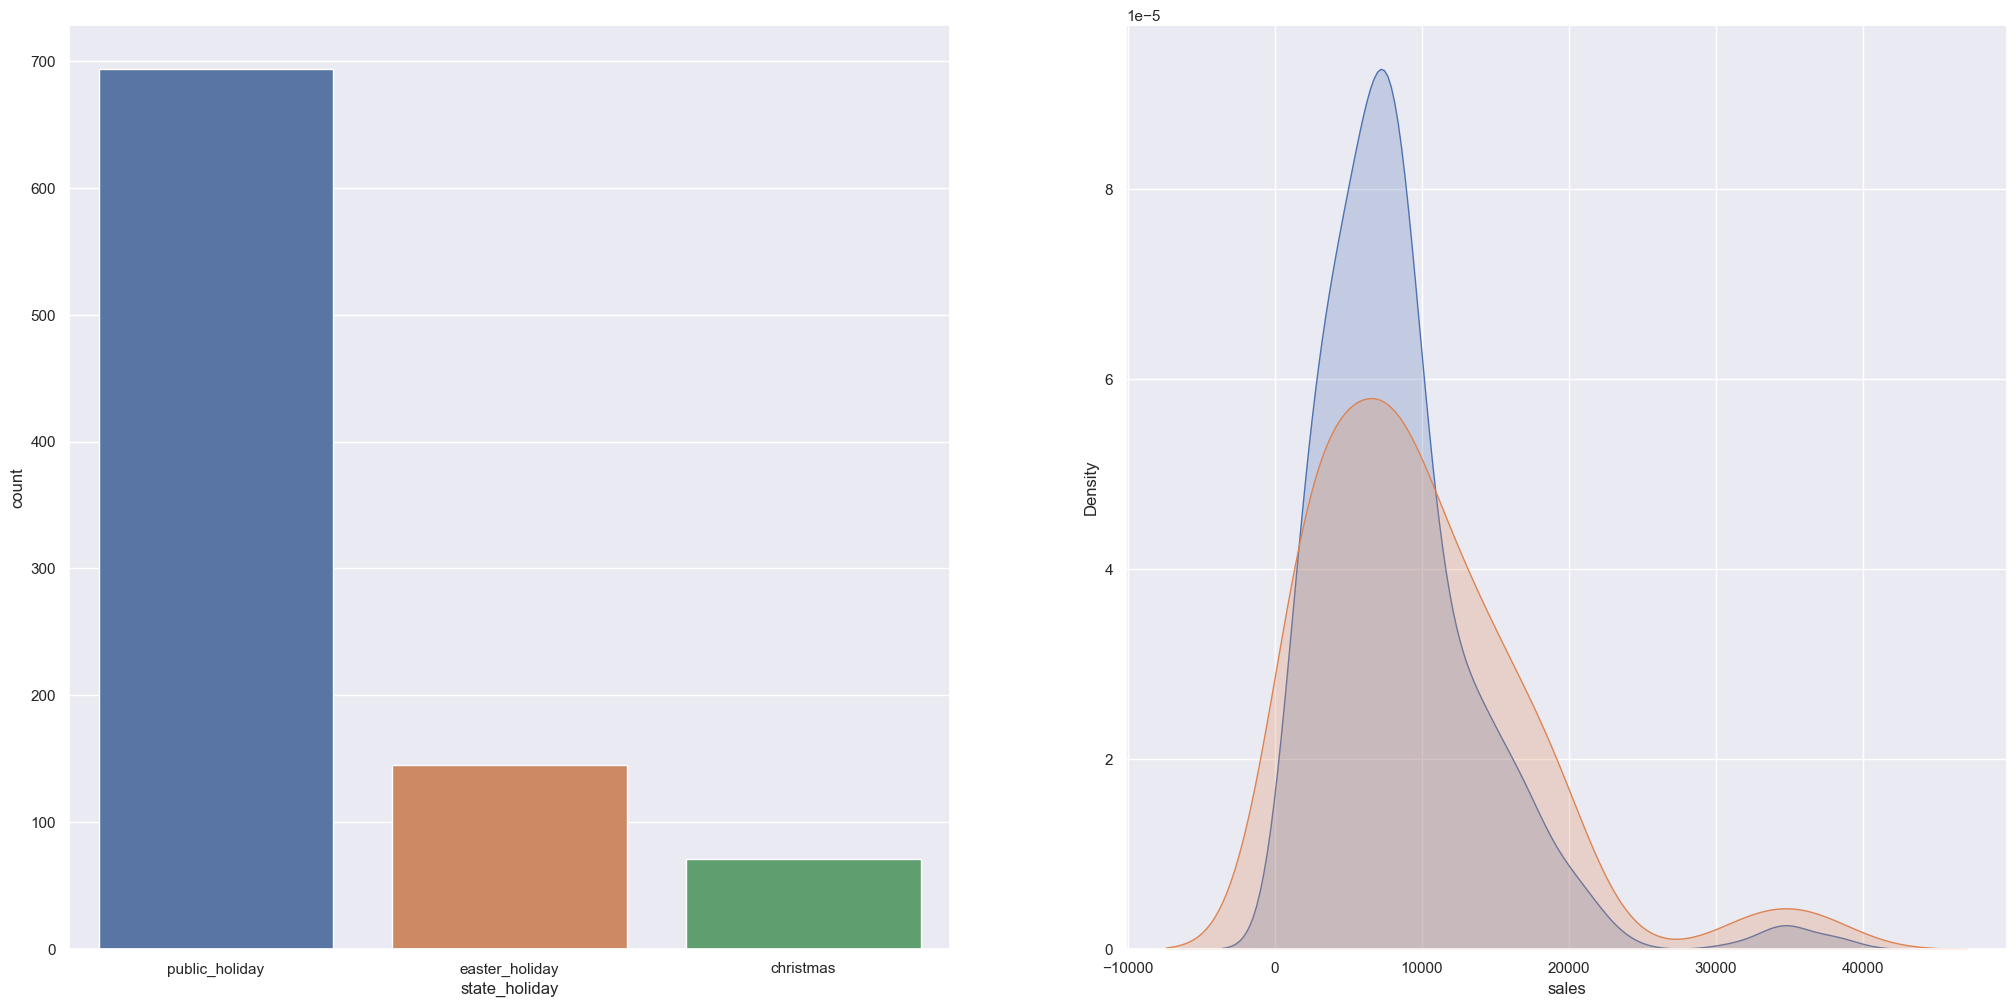

In [41]:
# state_holiday

# regular_day filter to clean graphic
a = df4[ df4[ 'state_holiday' ] != 'regular_day' ]

plt.subplot( 1, 2, 1 )
sns.countplot( data = a, x ='state_holiday' );

plt.subplot( 1, 2, 2 )
sns.kdeplot( df4[ df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', fill=True )
sns.kdeplot( df4[ df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday',    fill=True )
sns.kdeplot( df4[ df4['state_holiday'] == 'chrstimas_holiday']['sales'], label='chrstimas_holiday', fill=True )

# Response Variable

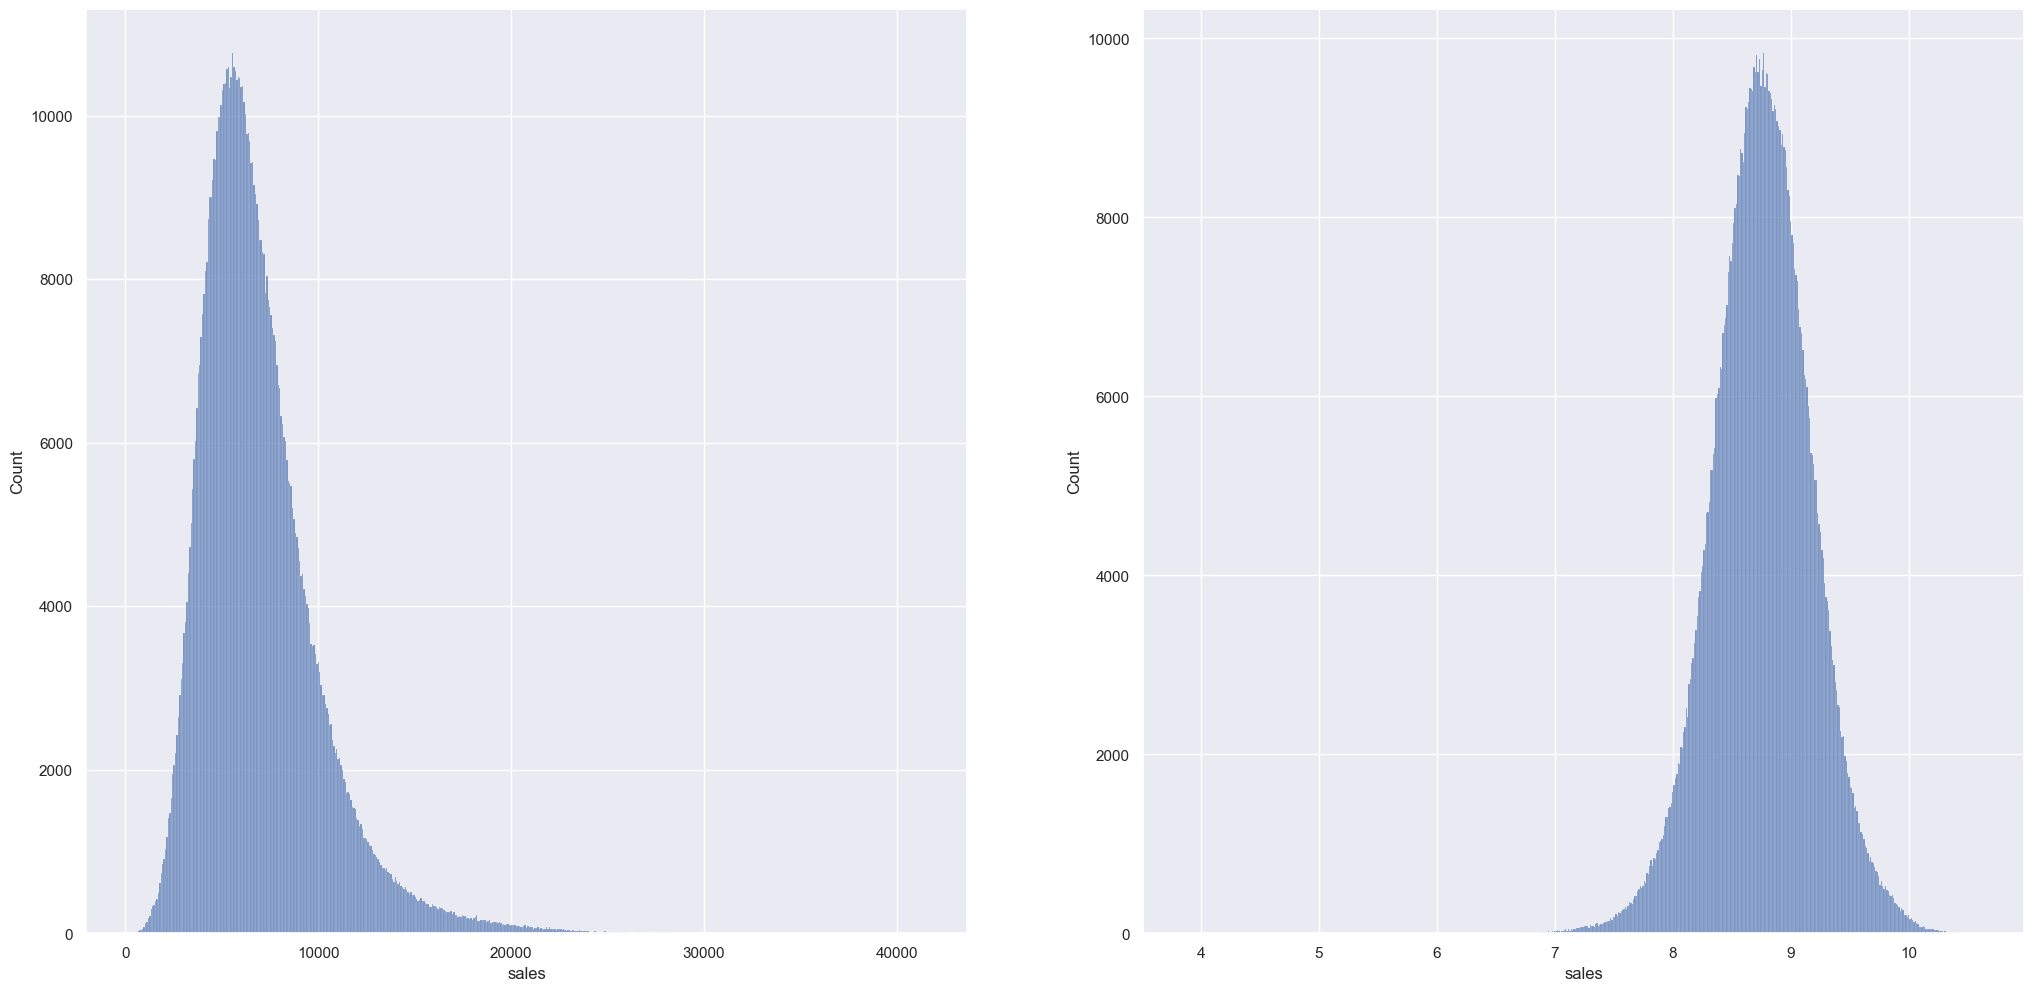

In [92]:
# logarithmic transformation on response variable application

def logarithmic(x):
    # response variable before transformations 
    plt.subplot(1,2,1)
    sns.histplot(df5['sales'])
    
    # response variable after transformations 
    df5['sales'] = np.log1p( df5['sales'] )
    plt.subplot(1,2,2)
    sns.histplot(df5['sales'])
    
# call logarithmic function    
logarithmic('sales')

### H1. Lojas com maior sortimentos deveriam vender mais:
**FALSA** Lojas com MAIOR SORTMENTO vendem MENOS.

#==================
# insights 01
#==================

# basic and extended looks like similar and extra assortment are totally back to other class

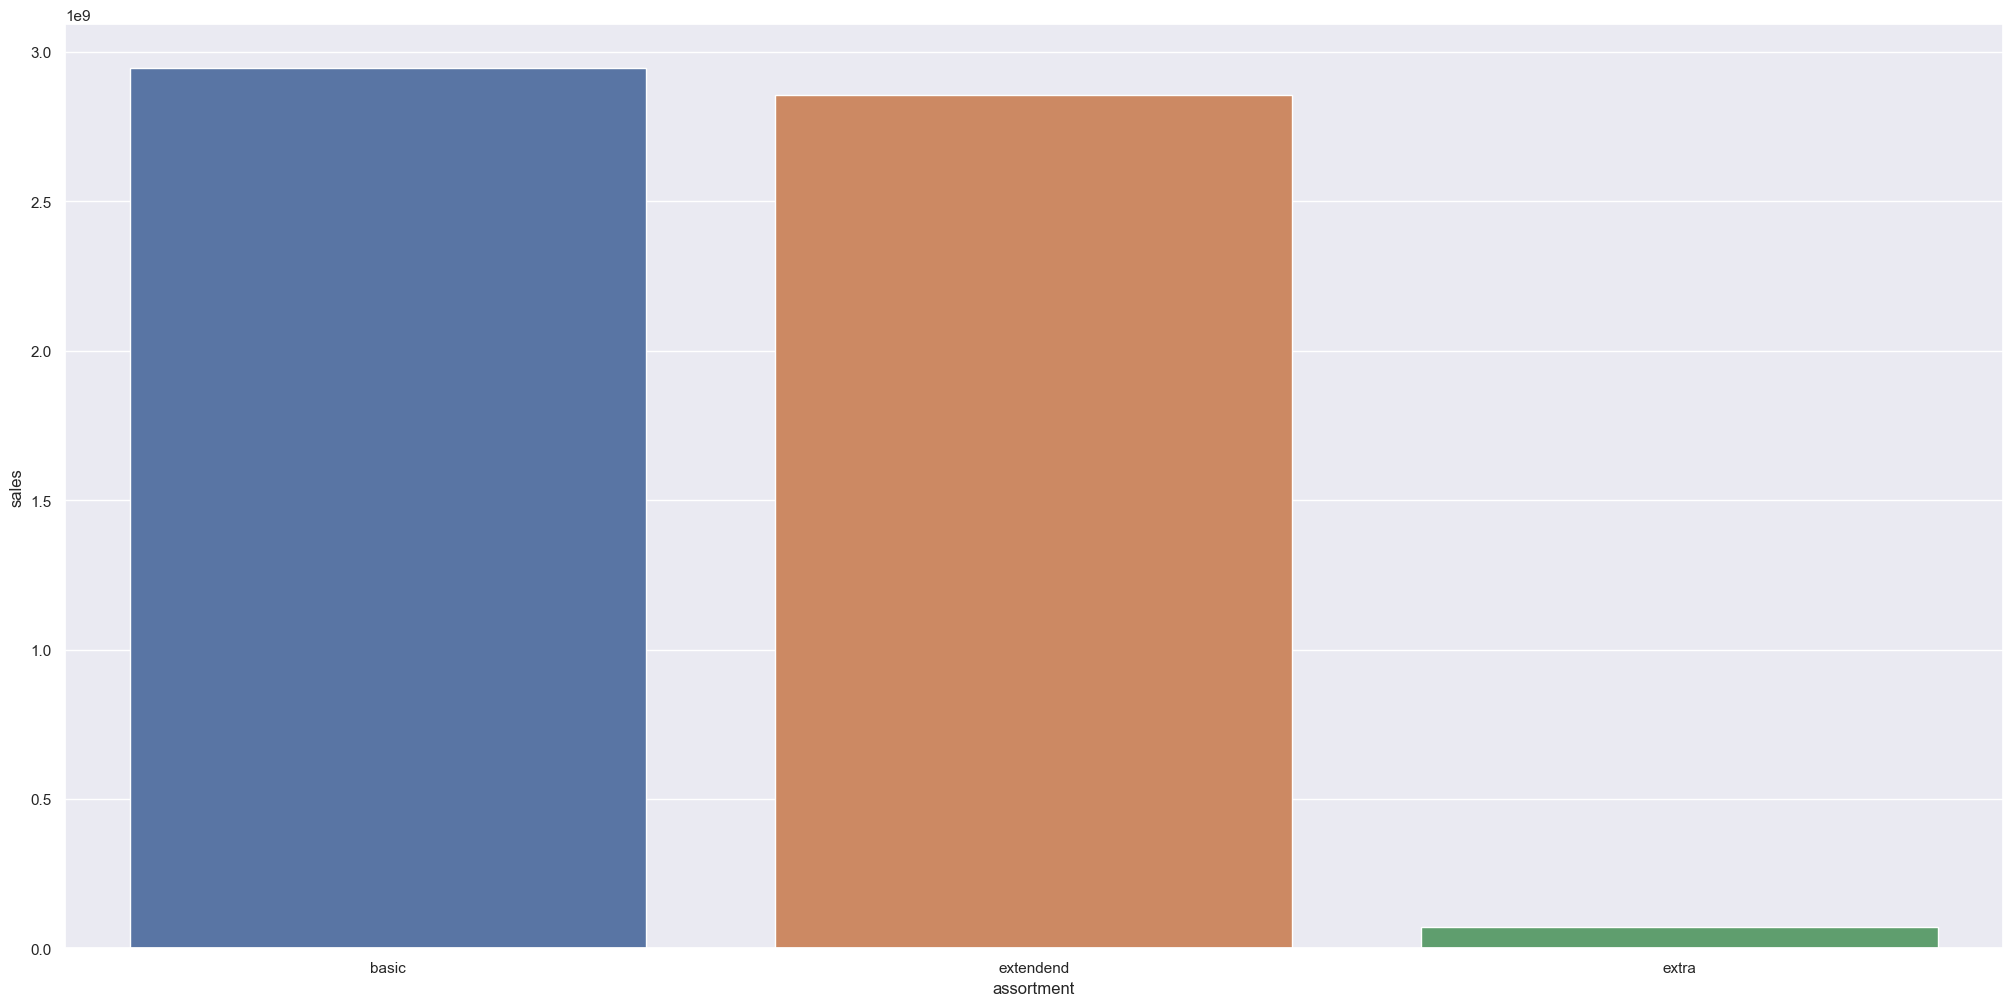

In [44]:
# with assortment and sales try analysis kind of sales those assortment type

aux1 = df4[['assortment', 'sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot( x = 'assortment', y='sales', data = aux1 );

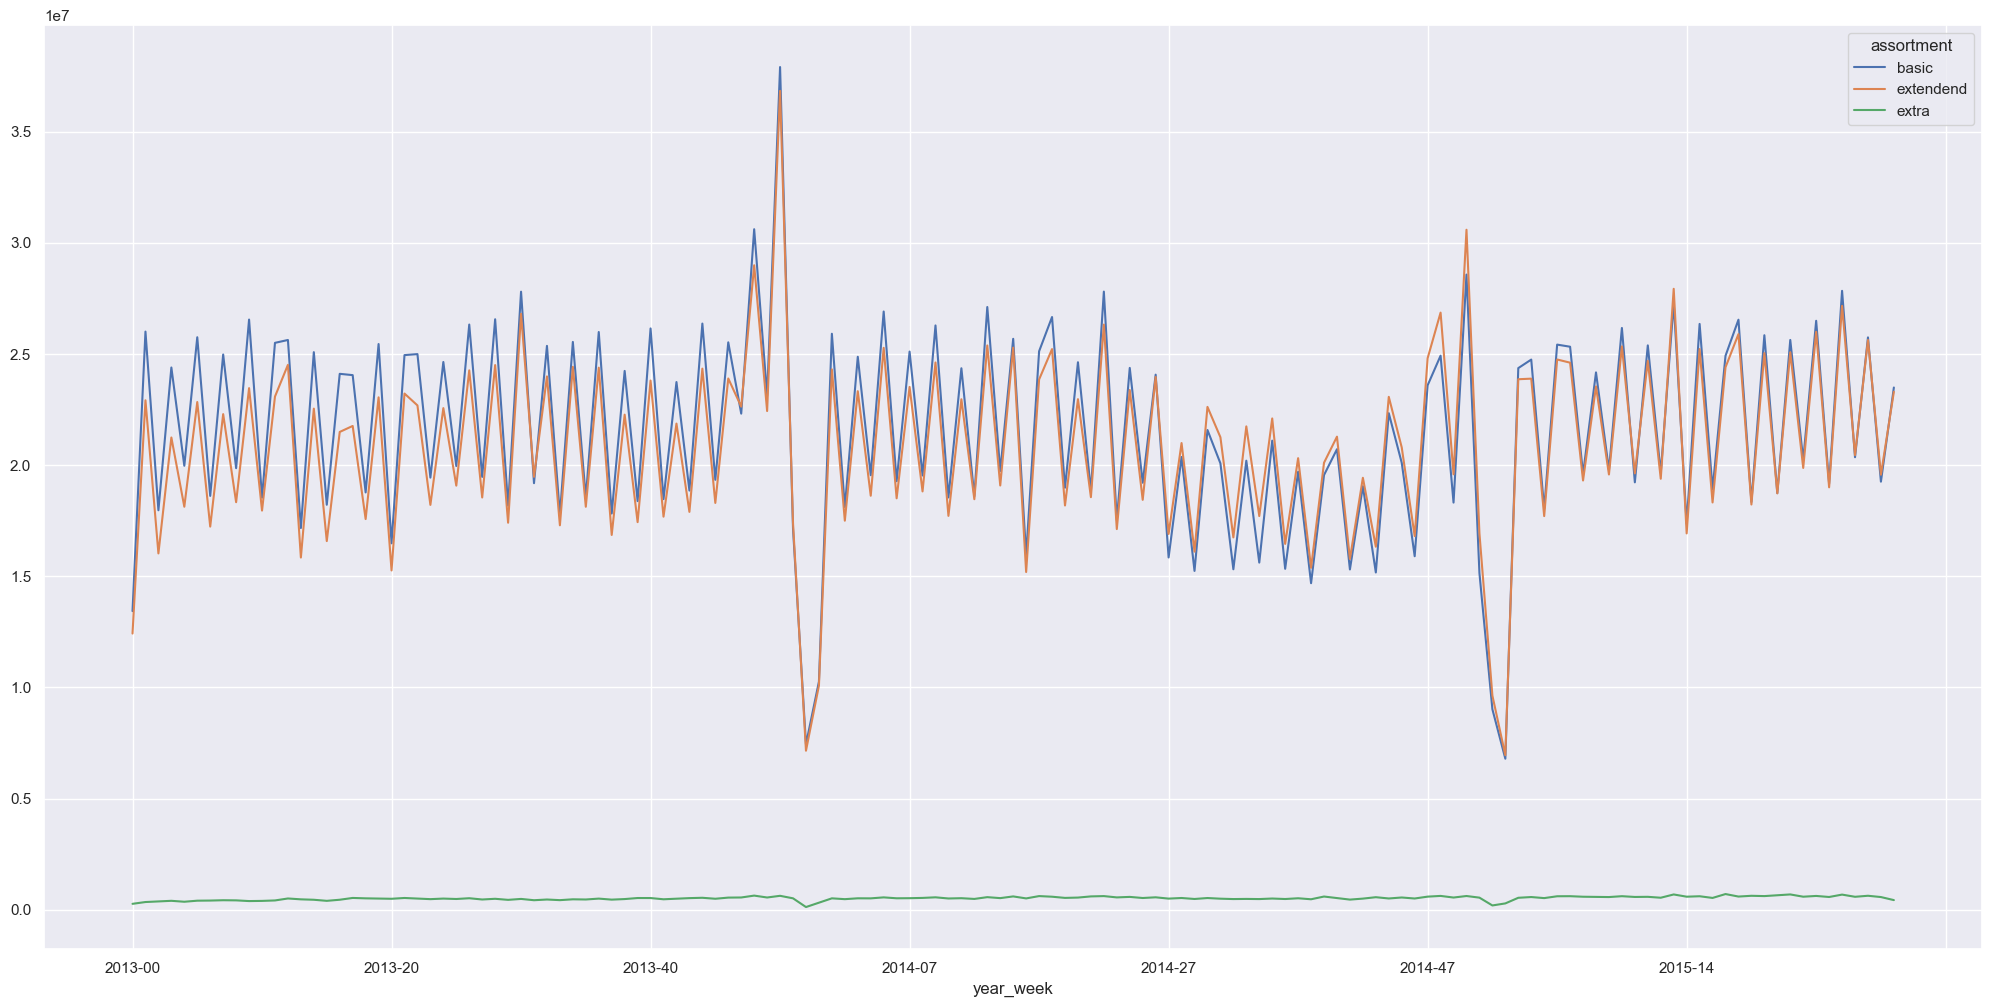

In [45]:
# Assortment variable analysis at time tendency

aux2 = df4[['assortment', 'sales', 'year_week']].groupby( [ 'year_week', 'assortment' ] ).sum().reset_index()
aux2.pivot( index = 'year_week', columns ='assortment', values ='sales' ).plot();

#==============
# insights 01
#==============
# basic and extended looks like similar and extra assortment are totally back to other class

#==================
# insights 02
#==================
# group of stores with close located sales more than farway; could because of competition...checkup next moment.

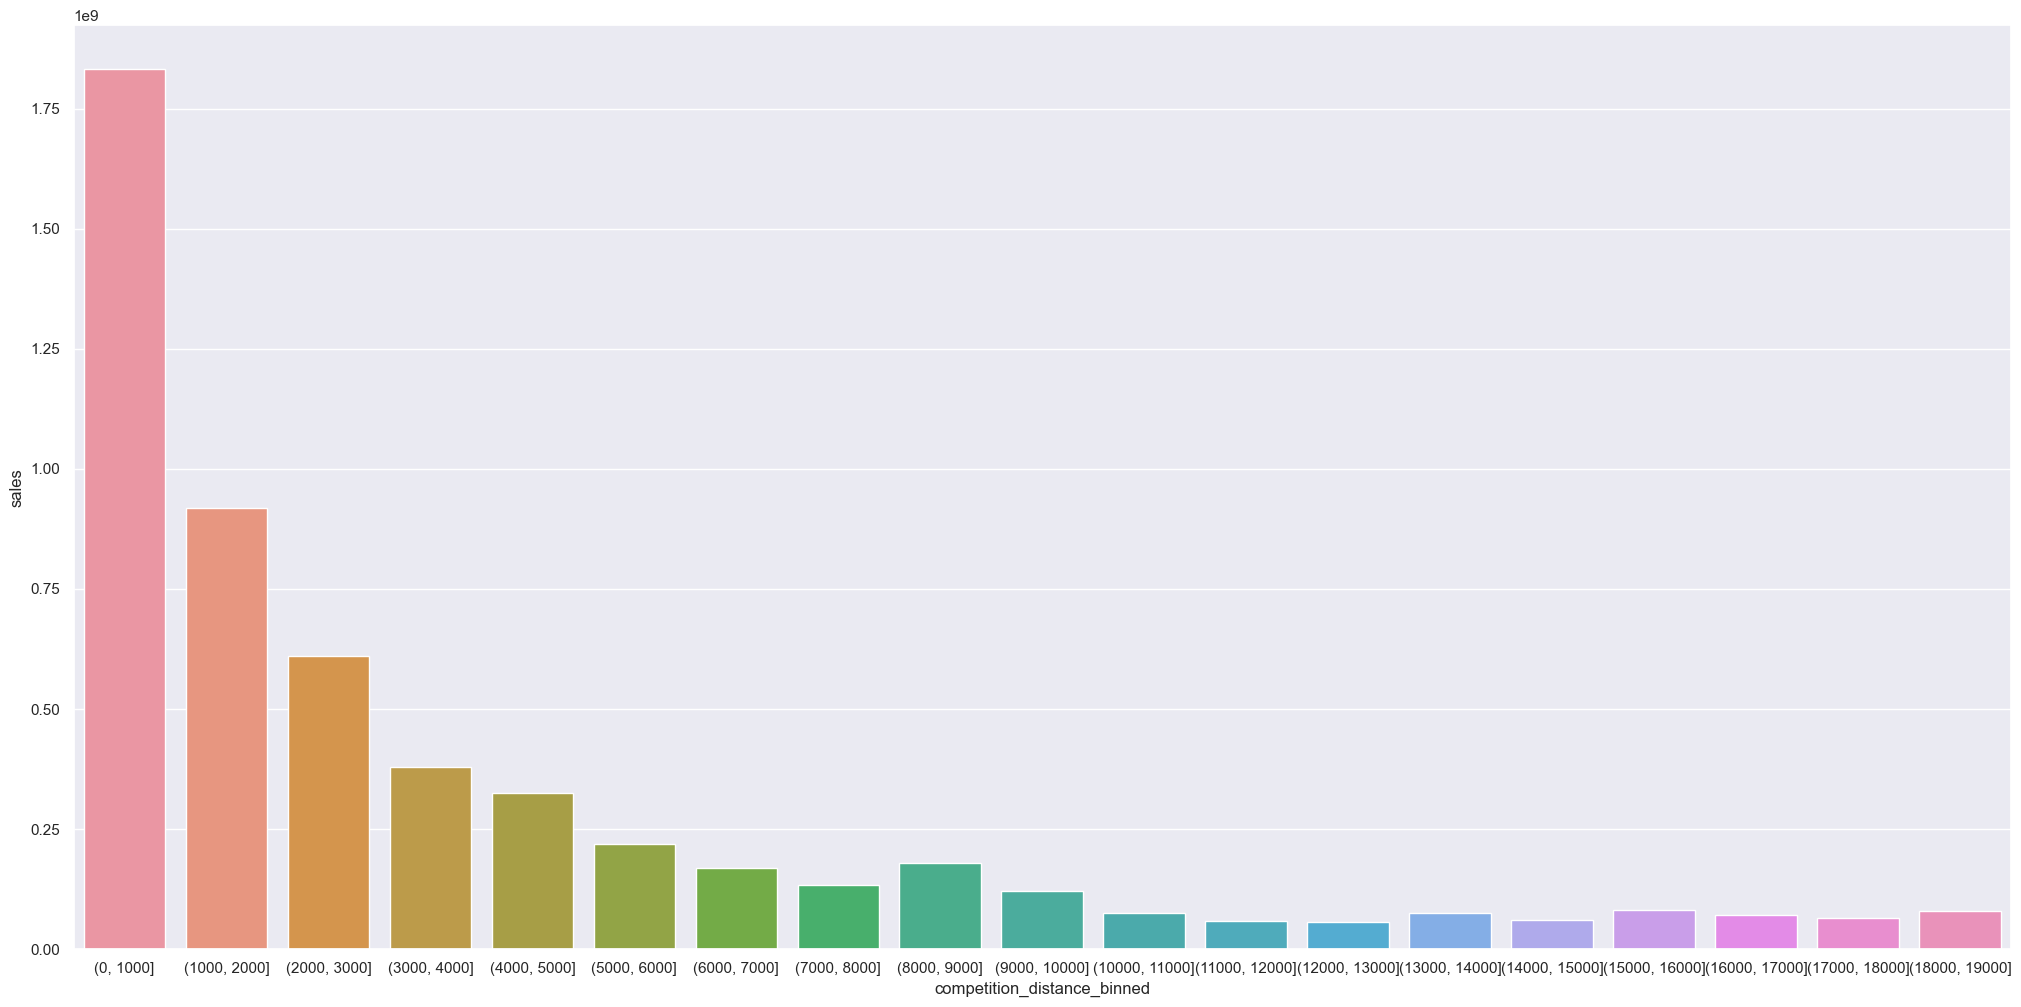

In [49]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

# group of users
bins = list( np.arange(0, 20000, 1000) )

aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned' ).sum().reset_index()

sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );

#==============
# insights 02
#==============
# group of stores with close located sales more than farway; could because of competition...checkup next moment.

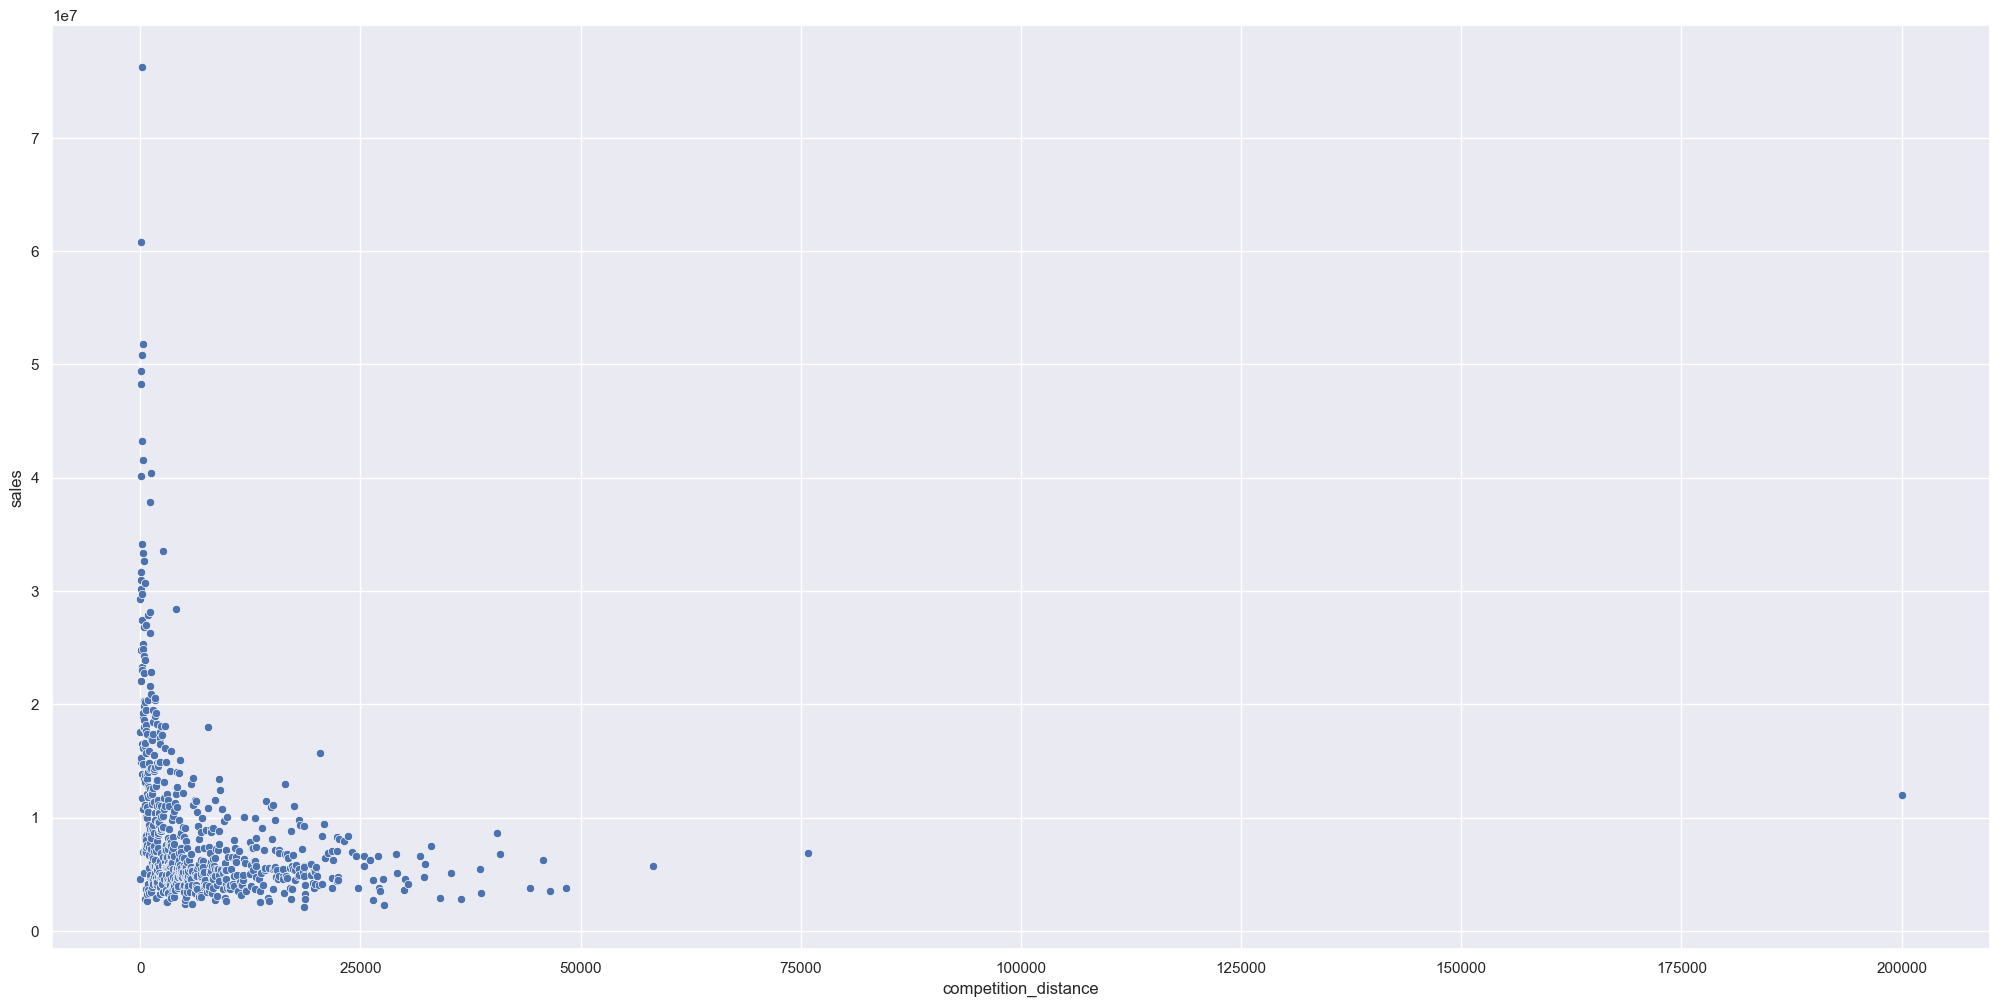

In [50]:
# some data with a lot of granularity we can follow the scatter plot... 

aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

sns.scatterplot( x ='competition_distance', y='sales', data=aux1 );

### H4. Lojas com promoções ativas por mais tempo deveriam vender mais.
**FALSA** Lojas com promoções ativas por mais tempo vendem menos, depois de um certo período.

In [ ]:
#==============
# insights 04
#==============
# promo_time_week shows up works properly until some moment which maintain sales upper to some period, but after promo_time_week goes down and not improve any more....
# the marketing play some influence and can boost sales tendency on the 

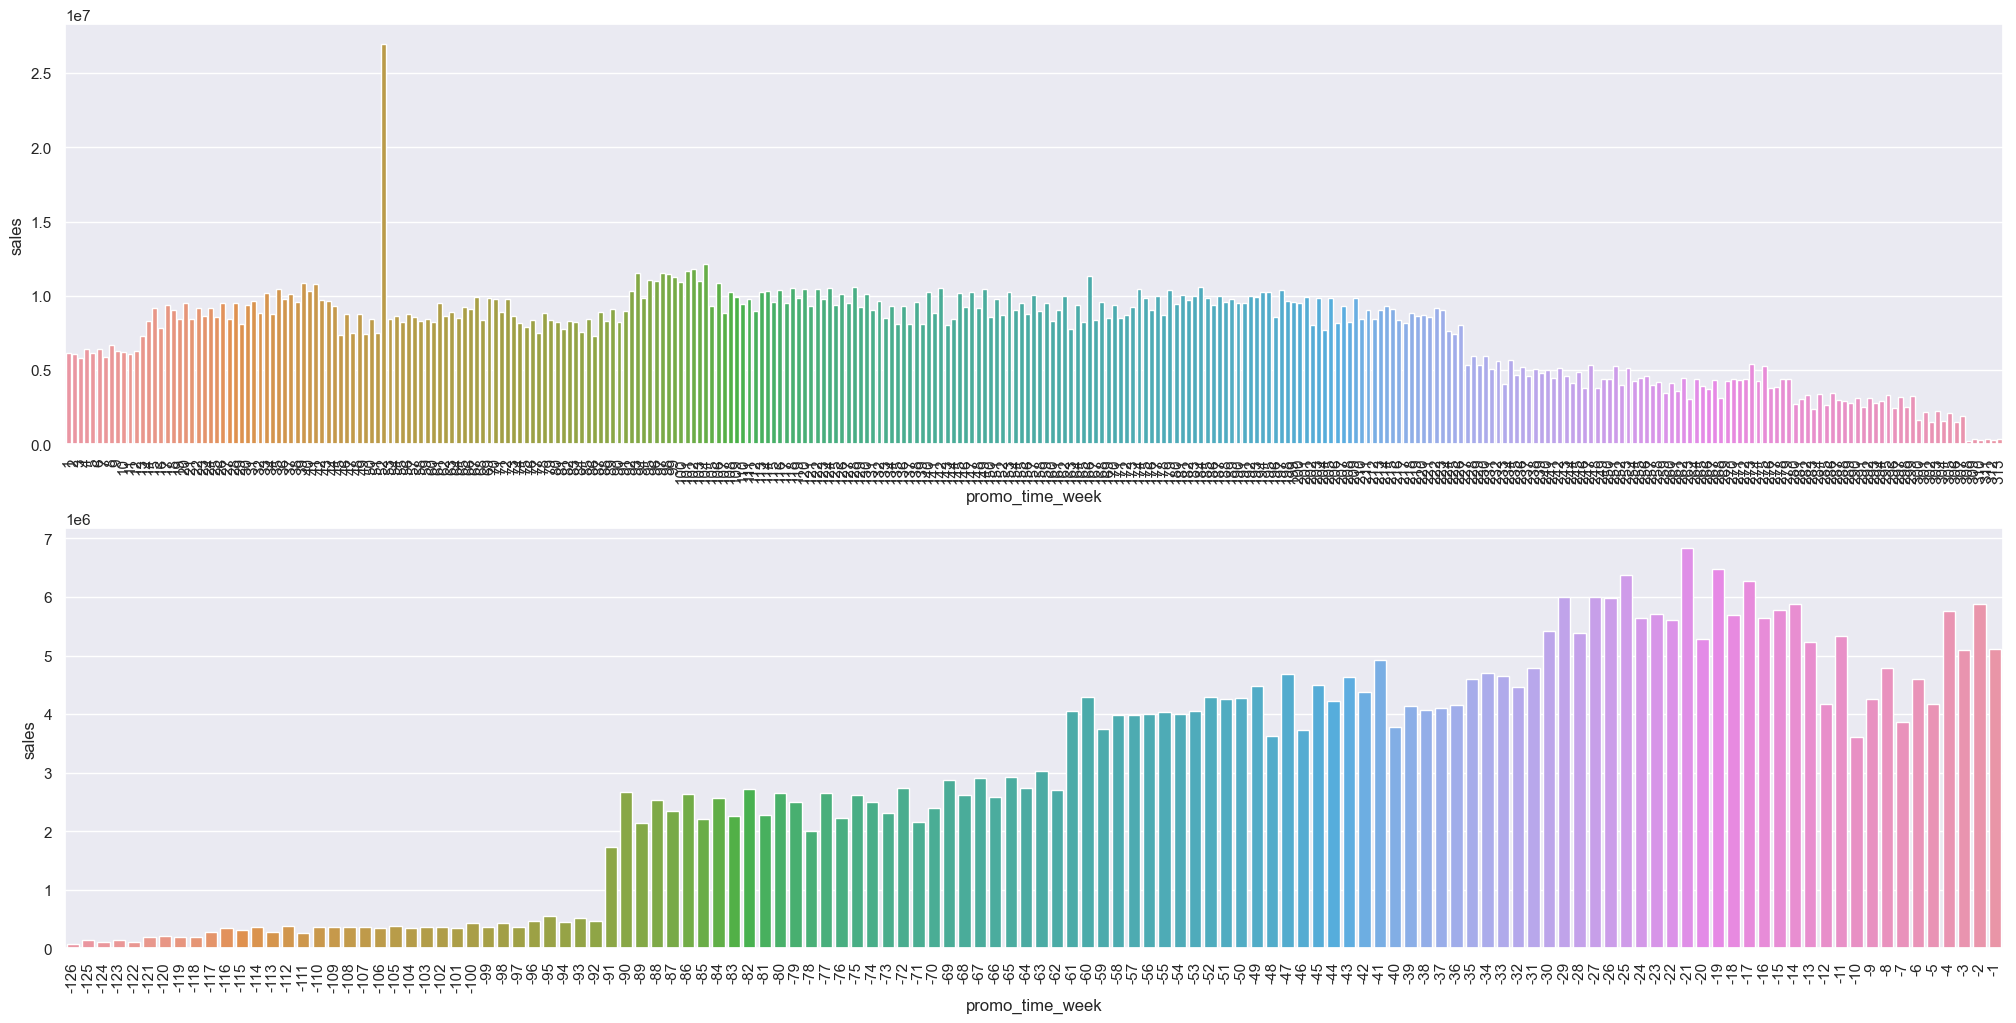

In [55]:
# with a 'promo_time_week' and 'sales' check up the longer promotion time impact lower sales...
# figure out the promo time standard and extended time of promotion moment 
# promo_time_week > 0 its promo extended otherwise standard promotion...

aux1 = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

sns.barplot( x='promo_time_week', y='sales', data=aux1 );

plt.subplot(2, 1, 1)
aux2 = aux1[aux1['promo_time_week'] > 0 ] # promo extendend
sns.barplot( x='promo_time_week', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot(2, 1, 2)
aux3 = aux1[aux1['promo_time_week'] < 0 ] # promo regular
sns.barplot( x='promo_time_week', y='sales', data=aux3 );
plt.xticks( rotation=90 );

#==============
# insights 04
#==============
# promo_time_week shows up works properly until some moment which maintain sales upper to some period, but after promo_time_week goes down and not improve any more....
# the marketing play some influence and can boost sales tendency on the customers we note on jumps of valleys of promo_time_week on plot

### **H8.** Lojas deveriam vender mais ao longo dos anos
**FALSA** Lojas estão vendendo menos ao longo dos últimos anos...

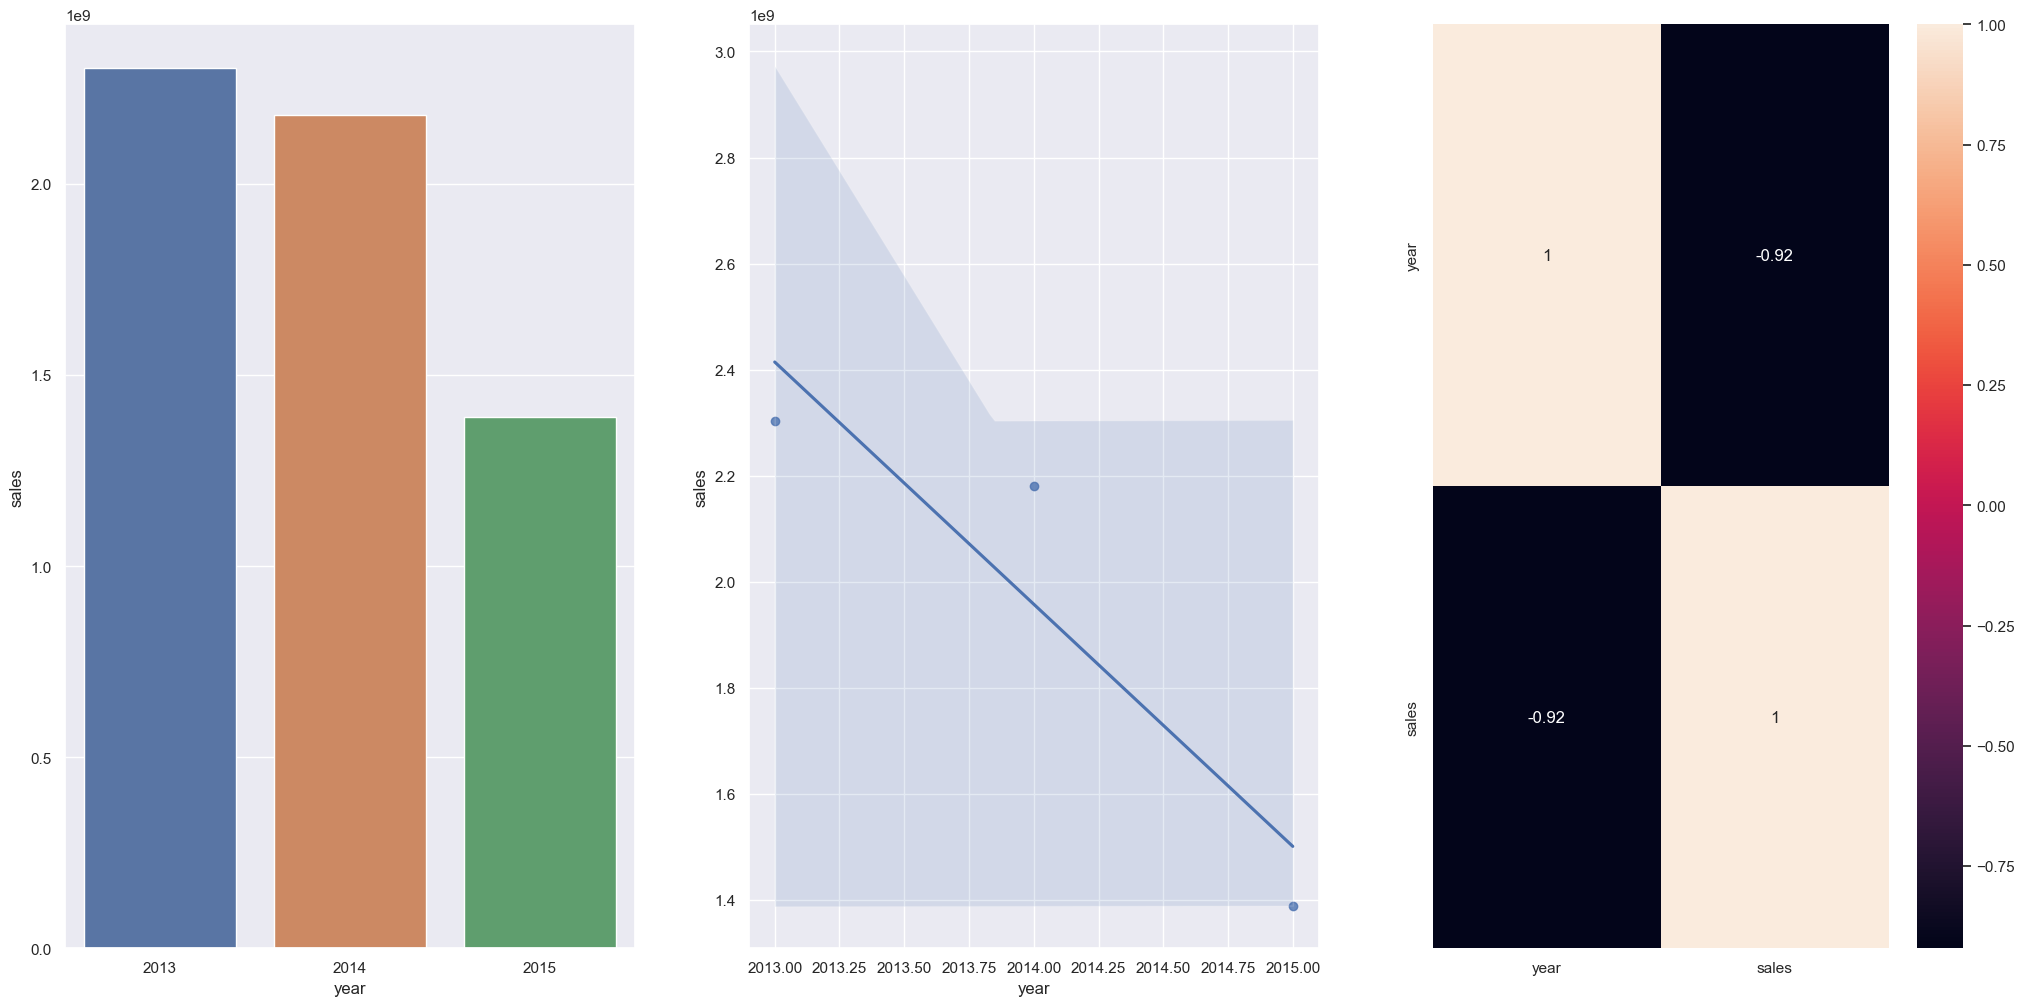

In [61]:
# 0.92 indicated the high correlation, and 2015 year impact negative analysis

aux1 = df4[['year','sales']].groupby('year').sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.barplot(x='year', y='sales', data=aux1)

plt.subplot( 1, 3, 2 )
aux1 = df4[['year','sales']].groupby('year').sum().reset_index()
sns.regplot(x='year', y='sales', data=aux1)

plt.subplot( 1, 3, 3 )
sns.heatmap(aux1.corr( method='pearson' ), annot=True);

### **H9.** Lojas deveriam vender mais no segundo semetre do ano
**FALSA** Lojas vendem menos no segundo semestre.

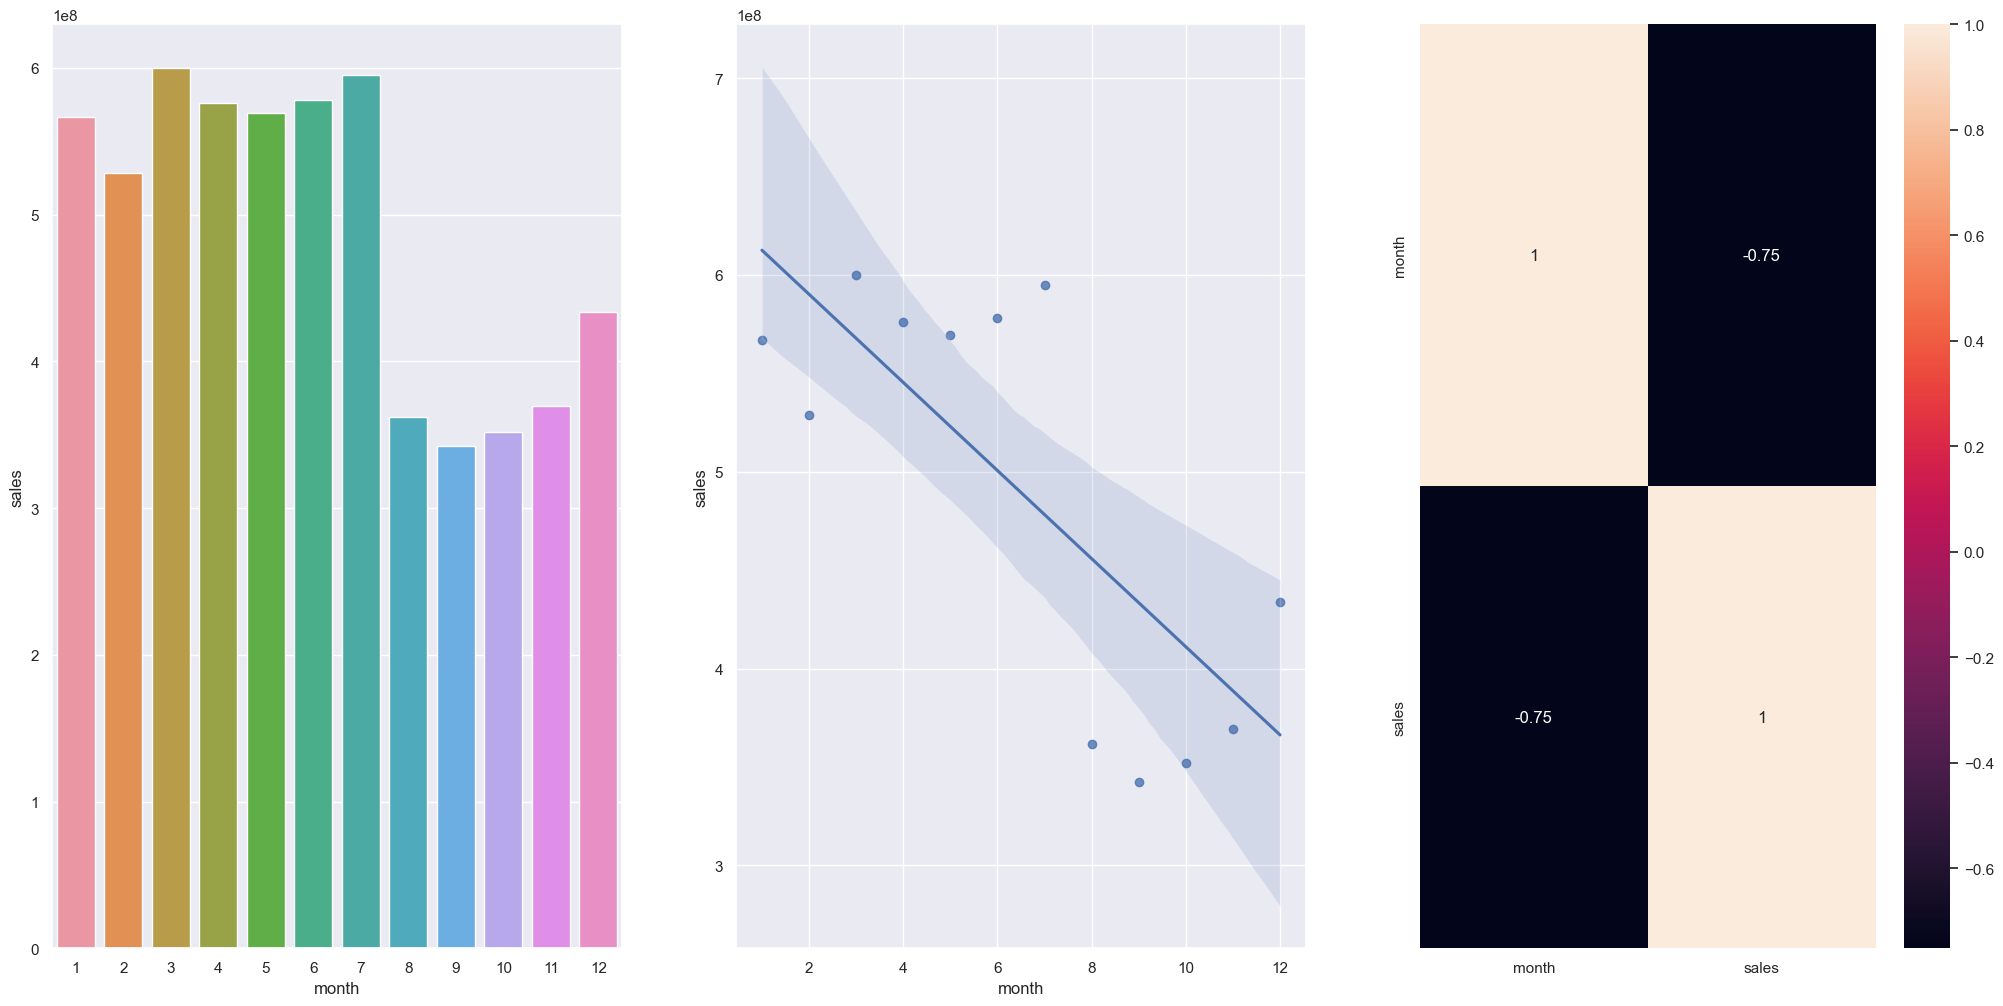

In [62]:
# in the second half year sales fall 
# 0.75 indicated the high correlation, 

aux1 = df4[['month','sales']].groupby('month').sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.barplot(x='month', y='sales', data=aux1);

plt.subplot( 1, 3, 2 )
sns.regplot(x='month', y='sales', data=aux1);

plt.subplot(1, 3, 3 )
sns.heatmap(aux1.corr(method='pearson'), annot=True);

# <font color='blue'>4.  Conclusão & Demonstração</font>

In [123]:
modelling_result_cv = pd.concat([lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv])
modelling_result_cv.sort_values('RMSE CV')

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Random Forest Regressor,932.8+/-251.76,0.13+/-0.03,1377.09+/-357.42
0,Linear_Regression,2129.88+/-322.07,0.3+/-0.01,3026.23+/-498.36
0,Lasso,2151.5+/-341.94,0.3+/-0.01,3095.2+/-504.18
0,XGBoost Regressor,7049.06+/-593.61,0.95+/-0.0,7715.69+/-694.1


In [130]:
# sum of predictions
df71 = df7[['store', 'predictions']].groupby( 'store' ).sum().reset_index()


# MAE and MAPE
df7_aux1 = df7[['store', 'sales', 'predictions']].groupby( 'store' ).apply(lambda x: mean_absolute_error( x['sales'], x['predictions'] ) ).reset_index().rename( columns={0:'MAE'})

df7_aux2 = df7[['store', 'sales', 'predictions']].groupby( 'store' ).apply(lambda x: mean_absolute_percentage_error( x['sales'], x['predictions'] ) ).reset_index().rename( columns={0:'MAPE'})

# Merge
df7_aux3 = pd.merge( df7_aux1, df7_aux2, how='inner', on='store' )
df72 = pd.merge( df71, df7_aux3, how='inner', on='store' )

# Scenarios
df72['worst_scenario'] = df72['predictions'] - df72['MAE']
df72['best_scenario'] = df72['predictions'] + df72['MAE']

# order columns
df72 = df72[['store', 'predictions', 'worst_scenario', 'best_scenario', 'MAE','MAPE']]


In [133]:
df73 = df72[['predictions', 'worst_scenario', 'best_scenario']].apply( lambda x: np.sum( x ), axis=0 ).reset_index().rename( columns={'index': 'Scenario', 0:'Values'} )

df73['Values'] = df73['Values'].map( 'R${:,.2f}'.format )
df73

,Scenario,Values
0,predictions,"R$287,624,928.00"
1,worst_scenario,"R$286,826,703.30"
2,best_scenario,"R$288,423,180.41"


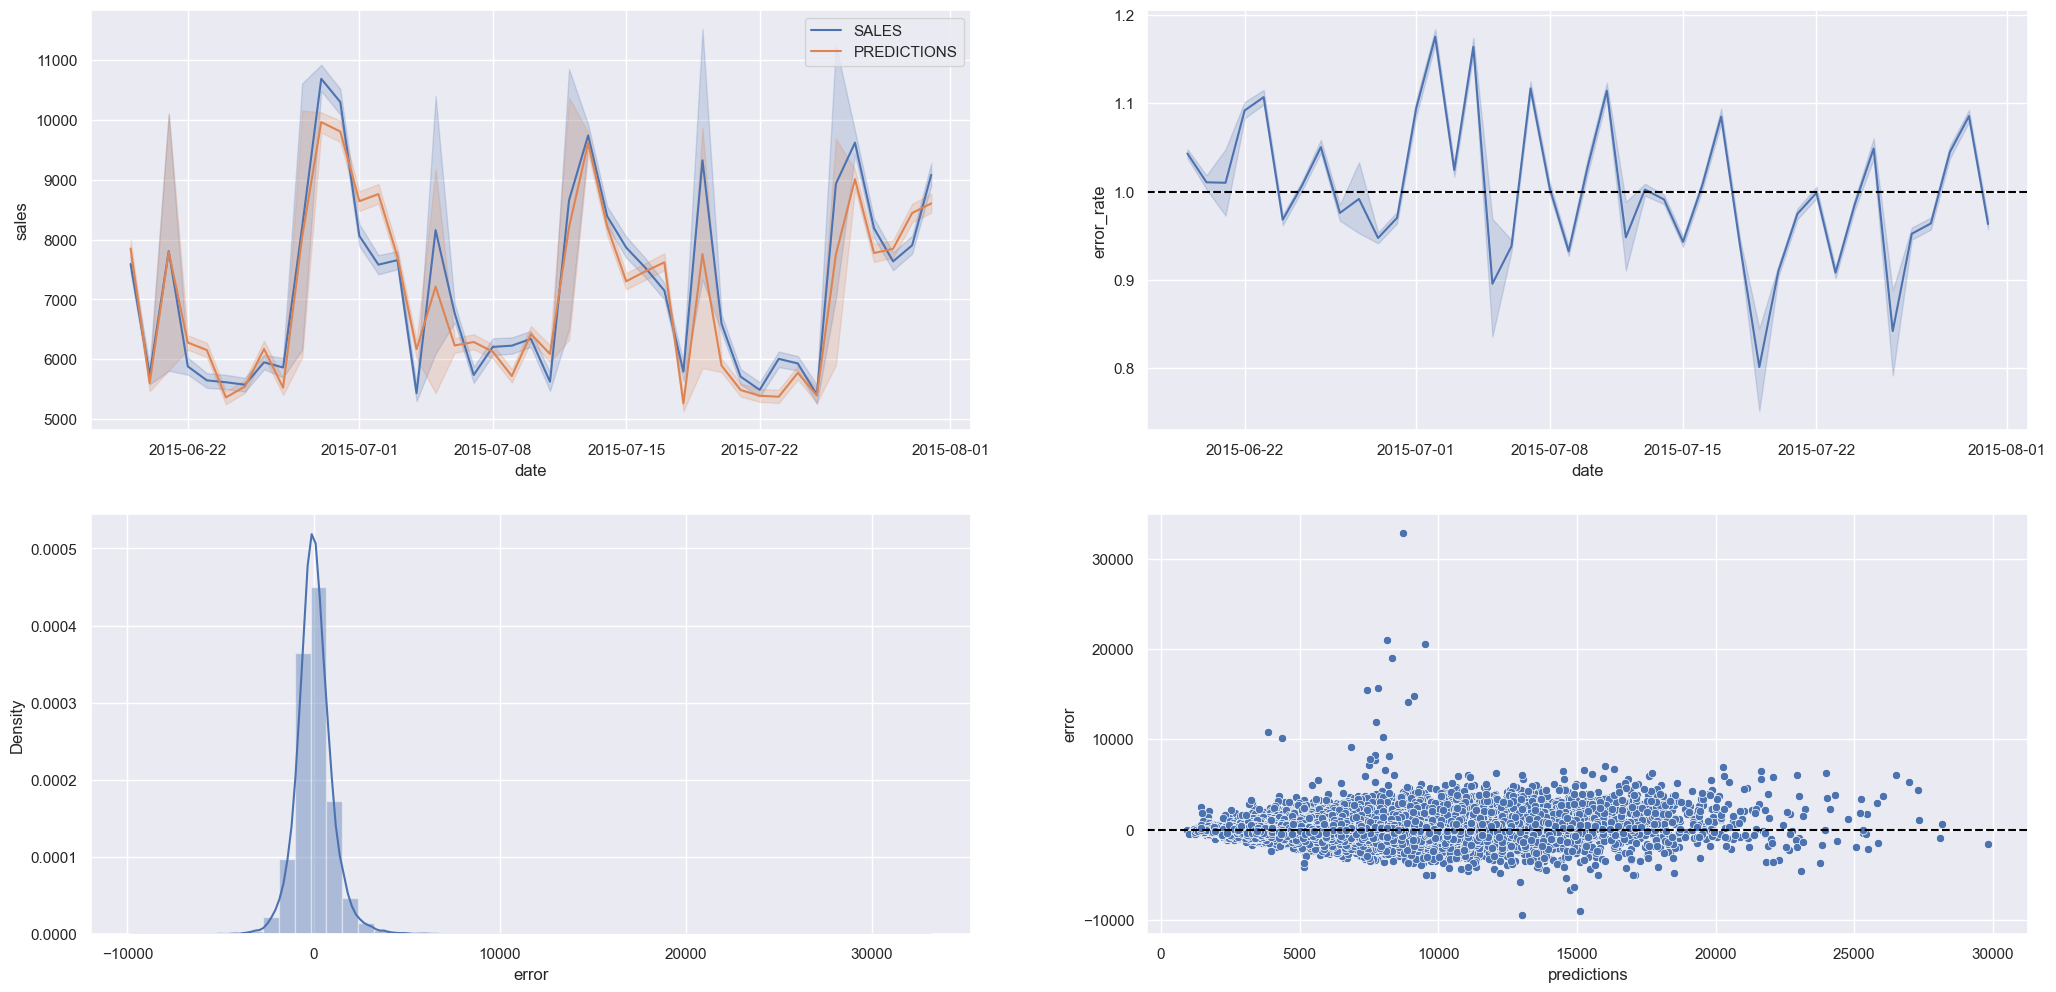

In [135]:
plt.subplot( 2, 2, 1 )
sns.lineplot( x='date', y='sales', data=df7, label='SALES' )
sns.lineplot( x='date', y='predictions', data=df7, label='PREDICTIONS' )

plt.subplot( 2, 2, 2 )
sns.lineplot( x='date', y='error_rate', data=df7 )

plt.axhline( 1, linestyle='--', color='black')
plt.subplot( 2, 2, 3 )
sns.distplot( df7['error'] )

plt.subplot( 2, 2, 4 )
sns.scatterplot( x= df7['predictions'], y= df7['error'], data=df72 )
plt.axhline( 1, linestyle='--', color='black')

# <font color='blue'>5. Próximas etapas </font>

In [ ]:
- Coletar feedback da Usabilidade do modelo